# <center>CHIRAC ou MITTERAND ? </center>

In [36]:
#Bibliothèques utiles
import numpy as np
import matplotlib.pyplot as plt
import codecs
import re #pour les regex
import os.path 
import string
from unidecode import unidecode #pour supprimer les accents
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #pour le bag of words
import nltk #pour racinisation, mots blancs et lemmatisation
from wordcloud import WordCloud #pour visualisation
import spacy #pour racinisation et lemmatisation


## Chargement des données

In [2]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt) #recupère le label (C ou M)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt) #recupère le texte
        if lab.count('M') >0:
            alllabs.append(-1)
        else:
            alllabs.append(1) #si c'est Mitterand qui parle on met -1 si c'est Chirac, on met 1
        alltxts.append(txt)
    return alltxts,alllabs

fname = "./corpus.tache1.learn.utf8"
alltxts,alllabs = load_pres(fname)

## Nettoyage des données

### 1) Pré-processing

In [3]:
#fonction de pré-traitement personnalisé
# -> suppression des chiffres
# -> suppression de la ponctuation
# -> suppression des accents
# -> mise en minuscule

def preprocessPerso(text): 
    #suppression de la ponctuation
    punc = string.punctuation
    punc += '\n\r\t'
    text = text.translate(str.maketrans(punc, ' '*len(punc)))
    #suppression des chiffres
    text = re.sub(r"[0-9]","",text)
    #suppression des accents
    text = unidecode(text)
    #mise en minuscule
    return text.lower()

### 2) Suppression des mots non discriminants

In [7]:
# Mots blancs + mots les plus fréquents

nltk.download('stopwords')
from nltk.corpus import stopwords
final_stopwords_list = stopwords.words('french')
#mots les plus fréquents donc non-discriminants
final_stopwords_list += ['ai','au','aujourd','aussi','autres','aux','avec','avez' ,'avons',
 'bien', 'ce' ,'cela', 'ces', 'cette' ,'ceux', 'chacun' ,'comme', 'dans' ,'date'
 'de', 'depuis', 'des' ,'deux' ,'dire' ,'doit' ,'dont' ,'du'
 'elle' ,'en' ,'encore', 'ensemble', 'entre', 'est' ,'et', 'etat', 'ete' ,'etre',
 'europe' ,'faire' ,'fait' ,'faut', 'francais' ,'france', 'hui' ,'ici', 'il' ,'ils',
 'je' ,'la', 'le' ,'les', 'leur' ,'leurs', 'mais', 'meme' ,'monde', 'monsieur' ,'ne',
 'nom', 'nos', 'notre', 'nous', 'on', 'ont' ,'ou', 'paix', 'par', 'pas', 'pays',
 'peut' ,'plus' ,'politique' ,'pour', 'president' ,'qu', 'que' ,'qui', 'sa', 'sans',
 'se' ,'ses' ,'si' ,'son' ,'sont', 'sur', 'temps', 'tous', 'tout', 'toute' ,'toutes',
 'tres', 'un' ,'une' ,'union', 'vie', 'vos' ,'votre', 'vous']

print(len(final_stopwords_list))
print(final_stopwords_list)

253
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nilsbarrellon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1er bag of words


Taille du BOW 1= (57413, 26894)
Taille du vocabulaire =  26894


(-0.5, 1499.5, 999.5, -0.5)

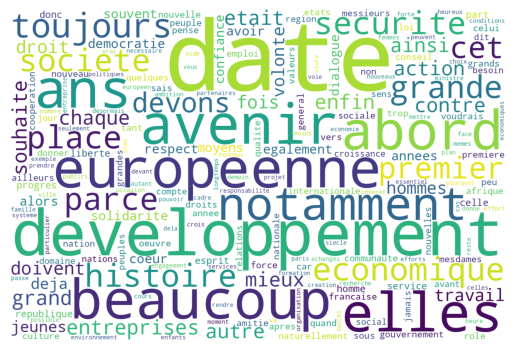

In [31]:
vectorizer = CountVectorizer(stop_words=final_stopwords_list,analyzer="word", preprocessor=preprocessPerso)
BOW1 = vectorizer.fit_transform(alltxts)
print("Taille du BOW 1=",BOW1.shape)
word_counts = BOW1.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 2eme bag of words => utilisation de TF_IDF

In [34]:
use_idf=True
smooth_idf=True
sublinear_tf=False

vectorizer = TfidfVectorizer(use_idf= use_idf, smooth_idf=smooth_idf, sublinear_tf=sublinear_tf,preprocessor=preprocessPerso,stop_words=final_stopwords_list)
BOW2 = vectorizer.fit_transform(alltxts)
vocabulaire = vectorizer.get_feature_names_out()

print("Taille de BOW 2=",BOW2.shape)
print("Nb de mots du vocabulaire:",len(vocabulaire))
print("--------------- Vocabulaire -------------------")
print(vocabulaire[100:200])

Taille de BOW 2= (57413, 26894)
Nb de mots du vocabulaire: 26894
--------------- Vocabulaire -------------------
['abritent' 'abriter' 'abritez' 'abrogation' 'abroge' 'abscons' 'absence'
 'absent' 'absente' 'absenteisme' 'absenter' 'absentes' 'absents' 'absolu'
 'absolua' 'absolue' 'absolument' 'absolus' 'absolutisme' 'absorbe'
 'absorber' 'absorbera' 'absorbes' 'absorption' 'abstenir' 'abstention'
 'abstentionnisme' 'abstenue' 'abstraction' 'abstraire' 'abstrait'
 'abstraite' 'abstraits' 'absurde' 'absurdement' 'absurdes' 'absurdite'
 'absurdites' 'abuja' 'abus' 'abusait' 'abuse' 'abuser' 'abuses' 'abusive'
 'abusivement' 'abusives' 'abymes' 'academicien' 'academiciens' 'academie'
 'academies' 'academique' 'acadie' 'acadien' 'acadienne' 'acadiennes'
 'acadiens' 'acapulco' 'accable' 'accablent' 'accables' 'accaparement'
 'accaparer' 'accedant' 'accedants' 'accede' 'accedent' 'acceder'
 'accedera' 'accederent' 'accelerateur' 'accelerateurs' 'acceleration'
 'accelerations' 'accelere' 'ac

## 3ème bag of words : N-GRAMMES

In [35]:
ngram_range = (1,2) # unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=ngram_range,analyzer='word',stop_words=final_stopwords_list,preprocessor=preprocessPerso) # Maybe 2-grams or 3-grams bring improvements ?
BOW3 = vectorizer.fit_transform(alltxts)
vocabulaire = vectorizer.get_feature_names_out()
print("Taille de BOW 3=",BOW3.shape)
print("Nb de mots du vocabulaire:",len(vocabulaire))
print("--------------- Vocabulaire -------------------")
print(vocabulaire[100:200])

Taille de BOW 3= (57413, 387669)
Nb de mots du vocabulaire: 387669
--------------- Vocabulaire -------------------
['abandonner rien' 'abandonner role' 'abandonner sienne' 'abandonner sort'
 'abandonner trois' 'abandonnerai' 'abandonnerai donc' 'abandonnes'
 'abandonnes connaissent' 'abandonnes difficultes' 'abandonnes memes'
 'abandonnes occasions' 'abandonnes parce' 'abandonnes pouvoirs'
 'abandonnes sort' 'abandonnes tete' 'abandonnes vaincus' 'abandonnons'
 'abandonnons sort' 'abandonnons valeurs' 'abat' 'abat priorite'
 'abat republique' 'abattage' 'abattage nombreux' 'abattage produits'
 'abattage va' 'abattait' 'abattait grande' 'abattait mur'
 'abattait partie' 'abattait tragiquement' 'abatte' 'abatte nouveau'
 'abattent' 'abattent force' 'abattre' 'abattre barrieres'
 'abattre coalitions' 'abattu' 'abattu extremisme' 'abattu infamie'
 'abattues' 'abattues attentats' 'abattues personnes' 'abattues portes'
 'abbaye' 'abbaye dames' 'abbaye hommes' 'abbayes' 'abbayes lycee' 'abbes

## 4eme Bag of words : après RACINISATION

In [67]:
nlp = spacy.load("fr_core_news_sm", disable=["parser", "ner"])  # Désactive les composants inutiles pour accélérer

def lemmatisation(text, stopwords):
    text = preprocessPerso(text)
    doc = nlp(text.lower())
    # Lemmatiser uniquement les mots qui ne sont pas des stopwords
    lemmatized = [token.lemma_ for token in doc if token.text not in stopwords]
    text = " ".join(lemmatized).strip()
    #on supprime les espaces surnuméraires
    text = re.sub(r'\s+', ' ', text)
    return text

# Pré-traiter tous les textes
compteur = 0
alltxts_lemmatise = []
n = len(alltxts)
for text in alltxts:
    if compteur%100==0:
        print("Traitement ",compteur,"/",n)
    alltxts_lemmatise.append(lemmatisation(text, final_stopwords_list))
    compteur+=1


Traitement  0 / 57413
Traitement  100 / 57413
Traitement  200 / 57413
Traitement  300 / 57413
Traitement  400 / 57413
Traitement  500 / 57413
Traitement  600 / 57413
Traitement  700 / 57413
Traitement  800 / 57413
Traitement  900 / 57413
Traitement  1000 / 57413
Traitement  1100 / 57413
Traitement  1200 / 57413
Traitement  1300 / 57413
Traitement  1400 / 57413
Traitement  1500 / 57413
Traitement  1600 / 57413
Traitement  1700 / 57413
Traitement  1800 / 57413
Traitement  1900 / 57413
Traitement  2000 / 57413
Traitement  2100 / 57413
Traitement  2200 / 57413
Traitement  2300 / 57413
Traitement  2400 / 57413
Traitement  2500 / 57413
Traitement  2600 / 57413
Traitement  2700 / 57413
Traitement  2800 / 57413
Traitement  2900 / 57413
Traitement  3000 / 57413
Traitement  3100 / 57413
Traitement  3200 / 57413
Traitement  3300 / 57413
Traitement  3400 / 57413
Traitement  3500 / 57413
Traitement  3600 / 57413
Traitement  3700 / 57413
Traitement  3800 / 57413
Traitement  3900 / 57413
Traitement  

In [68]:
print(alltxts[2])
print("-------------------------------")
print(alltxts_lemmatise[2])

 C'est toujours très émouvant de venir en Afrique car c'est probablement l'une des rares terres du monde où l'on ait conservé cette convivialité, cette amitié, ce respect de l'autre qui s'expriment avec chaleur, avec spontanéité et qui réchauffent le coeur de ceux qui arrivent et de ceux qui reçoivent.

-------------------------------
être toujours tre emouver venir afrique car être probablement rare terre avoir conserve convivialite amitie respect autre exprimer chaleur spontaneite rechauffer coeur celui arriver celui recoiver


In [71]:
#on sauvegarde dans un fichier les phrases lemmatisées et nettoyées car le processus est long !
#les labels sont toujours corrects dans alllabs
with open("corpus_nettoye_lemmatise.txt","w",encoding="utf-8") as f:
    for i in range(len(alltxts_lemmatise)):
        f.write(alltxts_lemmatise[i])
        f.write("\n")

In [72]:
#ouverture du fichier
alltxts_lemm = []
with open("corpus_nettoye_lemmatise.txt","r",encoding="utf-8") as f:
    for ligne in f:
        alltxts_lemm.append(ligne.strip())

Taille du BOW 4= (57413, 19049)
Taille du vocabulaire =  19049
Taille de BOW 4= (57413, 19049)
Nb de mots du vocabulaire: 387669
--------------- Vocabulaire -------------------
['abandonner rien' 'abandonner role' 'abandonner sienne' 'abandonner sort'
 'abandonner trois' 'abandonnerai' 'abandonnerai donc' 'abandonnes'
 'abandonnes connaissent' 'abandonnes difficultes' 'abandonnes memes'
 'abandonnes occasions' 'abandonnes parce' 'abandonnes pouvoirs'
 'abandonnes sort' 'abandonnes tete' 'abandonnes vaincus' 'abandonnons'
 'abandonnons sort' 'abandonnons valeurs' 'abat' 'abat priorite'
 'abat republique' 'abattage' 'abattage nombreux' 'abattage produits'
 'abattage va' 'abattait' 'abattait grande' 'abattait mur'
 'abattait partie' 'abattait tragiquement' 'abatte' 'abatte nouveau'
 'abattent' 'abattent force' 'abattre' 'abattre barrieres'
 'abattre coalitions' 'abattu' 'abattu extremisme' 'abattu infamie'
 'abattues' 'abattues attentats' 'abattues personnes' 'abattues portes'
 'abbaye' '

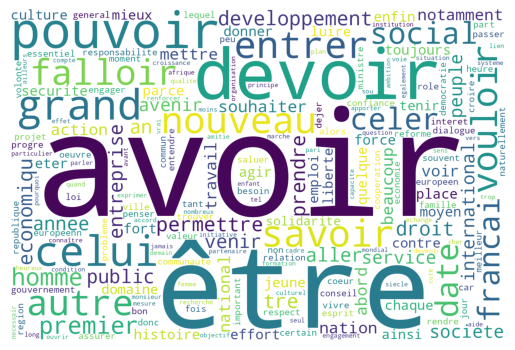

In [75]:
vectorizer = CountVectorizer()
BOW4 = vectorizer.fit_transform(alltxts_lemm)
print("Taille du BOW 4=",BOW4.shape)
word_counts = BOW4.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
print("Taille du vocabulaire = ",len(word_freq))

#word_freq : dictionnaire des mots et de leur fréquence DANS TOUS LES DOCUMENTS

wordcloud = WordCloud(background_color='white', max_words=200,width=1500,height=1000).generate_from_frequencies(word_freq)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
